# Project 2: Classification

In [2]:
# Basic Imports 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Modeling Tools 
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

#  Models 
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

In [3]:
# Custom, clearer column names
column_names = [
    'purchase_price',       # was 'buying'
    'maintenance_cost',     # was 'maint'
    'n_doors',         # was 'doors'
    'capacity',        # was 'persons'
    'luggage_size',    # was 'lug_boot'
    'safety_rating',   # was 'safety'
    'acceptability'    # was 'class'
]

# custom column names included
df = pd.read_csv('cardata.csv', header=None, names=column_names)

In [4]:
print(df.head())
print(df['acceptability'].value_counts())

  purchase_price maintenance_cost n_doors capacity luggage_size safety_rating  \
0          vhigh            vhigh       2        2        small           low   
1          vhigh            vhigh       2        2        small           med   
2          vhigh            vhigh       2        2        small          high   
3          vhigh            vhigh       2        2          med           low   
4          vhigh            vhigh       2        2          med           med   

  acceptability  
0         unacc  
1         unacc  
2         unacc  
3         unacc  
4         unacc  
unacc    1210
acc       384
good       69
vgood      65
Name: acceptability, dtype: int64


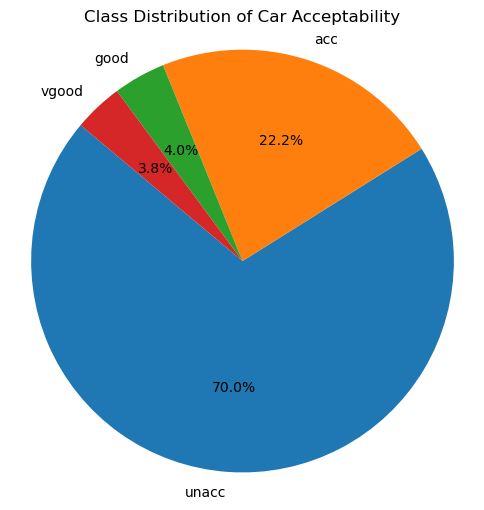

In [5]:
import matplotlib.pyplot as plt

# Value counts of target variable
class_counts = df['acceptability'].value_counts()

# Plot
plt.figure(figsize=(6,6))
plt.pie(class_counts, labels=class_counts.index, autopct='%1.1f%%', startangle=140)
plt.title("Class Distribution of Car Acceptability")
plt.axis('equal')  # Equal aspect ratio makes it a circle
plt.show()

In [6]:
for col in df.columns[:-1]:  # Skips 'acceptability' 
    print(f"{col}: {df[col].unique()}")

purchase_price: ['vhigh' 'high' 'med' 'low']
maintenance_cost: ['vhigh' 'high' 'med' 'low']
n_doors: ['2' '3' '4' '5more']
capacity: ['2' '4' 'more']
luggage_size: ['small' 'med' 'big']
safety_rating: ['low' 'med' 'high']


In [7]:
X = df.drop('acceptability', axis=1)
y = df['acceptability']

# Ordinal encoding
encoder = OrdinalEncoder()
X_encoded = encoder.fit_transform(X)
print(X_encoded)

[[3. 3. 0. 0. 2. 1.]
 [3. 3. 0. 0. 2. 2.]
 [3. 3. 0. 0. 2. 0.]
 ...
 [1. 1. 3. 2. 0. 1.]
 [1. 1. 3. 2. 0. 2.]
 [1. 1. 3. 2. 0. 0.]]


The dataset contains 1,728 car instances evaluated across six categorical features: purchase price, maintenance cost, number of doors, seating capacity, luggage size, and safety rating. The target variable is car "acceptability," which falls into one of four classes: unacc, acc, good, or vgood.

A preliminary inspection of the data shows a strong class imbalance. The majority class, unacc, accounts for approximately 70% of all observations, while the other three classes — especially good and vgood — are significantly underrepresented (each below 5%). This imbalance has implications for model evaluation: using accuracy alone would favor predictions biased toward the dominant class. To address this, I used additional metrics such as precision, recall, and F1-score, which better reflect a model's performance on minority classes.

## Train-Test Split

In [10]:
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.2, random_state=42, stratify=y
)

## Decision Tree

The Decision Tree classifier achieved a surprisingly high accuracy of 99%, with strong precision and recall across all classes, including the minority ones. While this performance is impressive, it's likely due in part to the clean and structured nature of the dataset, which was derived from a rule-based model.

              precision    recall  f1-score   support

         acc       0.95      0.99      0.97        77
        good       0.93      1.00      0.97        14
       unacc       1.00      0.99      1.00       242
       vgood       1.00      0.85      0.92        13

    accuracy                           0.99       346
   macro avg       0.97      0.96      0.96       346
weighted avg       0.99      0.99      0.99       346



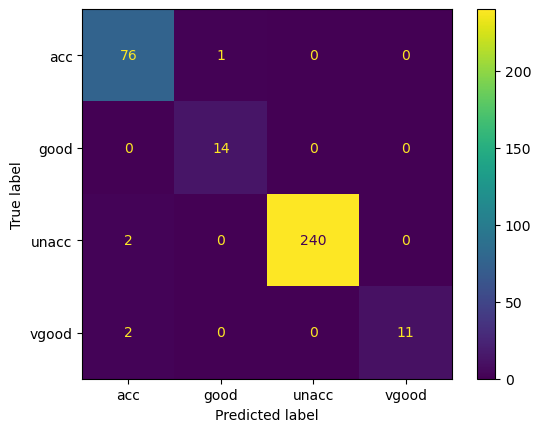

In [13]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

model = DecisionTreeClassifier(random_state=24)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# Metrics
print(classification_report(y_test, y_pred))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)


## Random Forest

 Random Forest trades a tiny bit of fit accuracy for much better robustness. RF was more consistent on minority classes — especially *vgood*

While both models performed exceptionally well on this dataset, the Decision Tree's high performance may stem from overfitting to the structured nature of the data. Random Forest, by averaging across multiple trees, offers more robust generalization and is less sensitive to small data variations. However, in this specific case, the simplicity of the problem means both models reach near-perfect scores. If applied to more complex or noisy datasets, Random Forest would likely outperform the single-tree approach.

In [17]:
from sklearn.ensemble import RandomForestClassifier
forest_model = RandomForestClassifier(random_state=24)
forest_model.fit(X_train, y_train)
y_rf_prediction = forest_model.predict(X_test)

                 🌲Random Forest🌲
              precision    recall  f1-score   support

         acc       0.95      0.94      0.94        77
        good       0.93      0.93      0.93        14
       unacc       0.98      0.99      0.99       242
       vgood       1.00      0.92      0.96        13

    accuracy                           0.97       346
   macro avg       0.96      0.94      0.95       346
weighted avg       0.97      0.97      0.97       346



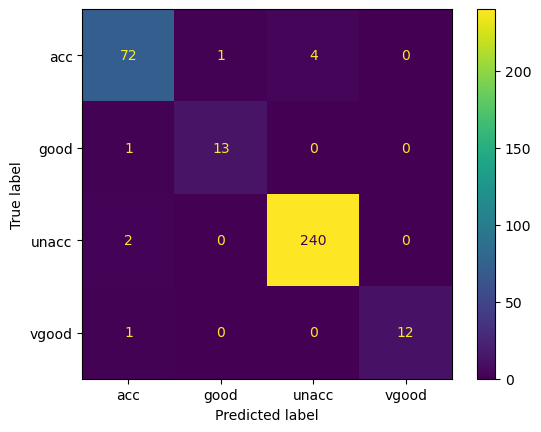

In [18]:
#Evaluation
print("                 🌲Random Forest🌲")
print(classification_report(y_test,y_rf_prediction))
ConfusionMatrixDisplay.from_predictions(y_test, y_rf_prediction)

## Support Vector Classification

The SVM classifier achieved 93% accuracy but struggled with minority classes, especially good (F1-score of 0.42). This is likely due to the mismatch between the SVM's reliance on numerical feature spaces and the dataset's fully categorical nature. Despite tuning options like kernel choice or encoding strategy, SVM is less suited for this type of structured categorical data than tree-based models.

=== SVM ===
              precision    recall  f1-score   support

         acc       0.82      0.87      0.84        77
        good       0.80      0.29      0.42        14
       unacc       0.97      0.99      0.98       242
       vgood       0.91      0.77      0.83        13

    accuracy                           0.93       346
   macro avg       0.87      0.73      0.77       346
weighted avg       0.93      0.93      0.92       346



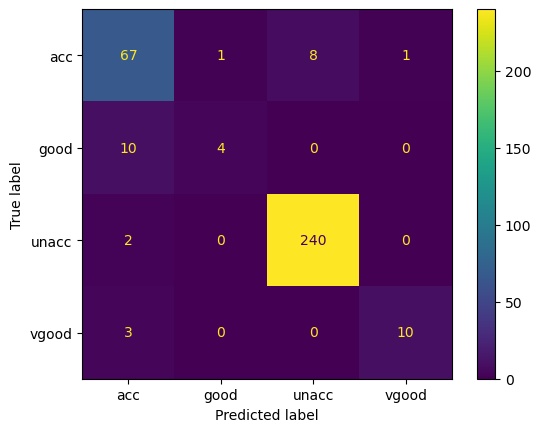

In [21]:
from sklearn.svm import SVC

svm_model = SVC(kernel='rbf', C=1.0)  # Default RBF kernel
svm_model.fit(X_train, y_train)
y_svm_pred = svm_model.predict(X_test)

print("=== SVM ===")
print(classification_report(y_test, y_svm_pred))
ConfusionMatrixDisplay.from_predictions(y_test, y_svm_pred)


## k Nearest Neighbors

The k-NN classifier achieved 91% overall accuracy, but struggled significantly with underrepresented classes like vgood (recall 0.38). This is due in part to the imbalanced dataset, as well as the limitations of using ordinal-encoded categorical features with a distance-based model. The performance of k-NN could potentially improve with proper feature engineering or alternative encoding methods, but in its current form, it underperforms compared to tree-based methods for this dataset.

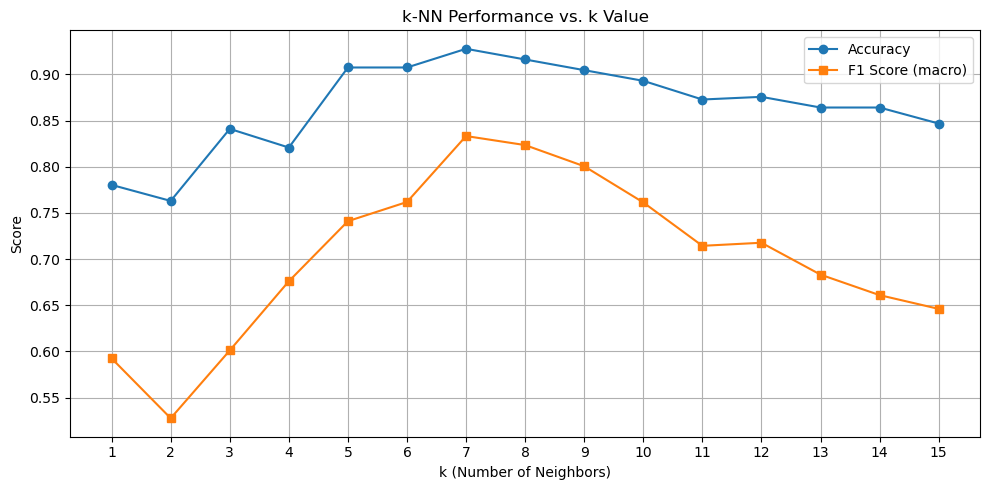

In [24]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score
import matplotlib.pyplot as plt
k_values = range(1, 16)
accuracies = []
f1_scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    
    accuracies.append(accuracy_score(y_test, y_pred))
    f1_scores.append(f1_score(y_test, y_pred, average='macro'))  # Macro = balanced across classes

# Plotting
plt.figure(figsize=(10, 5))
plt.plot(k_values, accuracies, label='Accuracy', marker='o')
plt.plot(k_values, f1_scores, label='F1 Score (macro)', marker='s')
plt.xlabel("k (Number of Neighbors)")
plt.ylabel("Score")
plt.title("k-NN Performance vs. k Value")
plt.xticks(k_values)
plt.legend()
plt.grid(True)
plt.tight_layout()
#plt.savefig("knn_validation_curve.png", dpi=300)
plt.show()

=== k-NN (k=7) ===
              precision    recall  f1-score   support

         acc       0.82      0.88      0.85        77
        good       0.89      0.57      0.70        14
       unacc       0.96      0.98      0.97       242
       vgood       1.00      0.69      0.82        13

    accuracy                           0.93       346
   macro avg       0.92      0.78      0.83       346
weighted avg       0.93      0.93      0.93       346



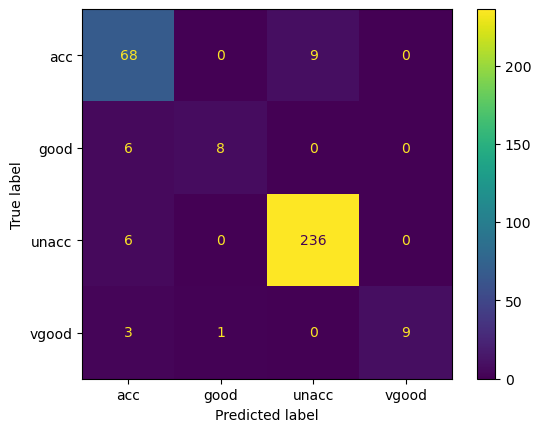

In [25]:
# Training k-NN with k=7 (default)
knn_model = KNeighborsClassifier(n_neighbors=7)
knn_model.fit(X_train, y_train)
y_knn_pred = knn_model.predict(X_test)

# Evaluate
print("=== k-NN (k=7) ===")
print(classification_report(y_test, y_knn_pred))
ConfusionMatrixDisplay.from_predictions(y_test, y_knn_pred)

## Naïve Bayes

Naive Bayes was the worst-performing model in my comparison, achieving only 64% accuracy and severely misclassifying minority classes. This can be attributed to several mismatches between the algorithm's assumptions and the data. Specifically, Naive Bayes assumes numerical, normally-distributed, and independent features — while the Car Evaluation dataset is fully categorical, interdependent, and better suited to rule-based or tree-based methods.

=== Naive Bayes ===
              precision    recall  f1-score   support

         acc       0.56      0.06      0.12        77
        good       0.00      0.00      0.00        14
       unacc       0.84      0.84      0.84       242
       vgood       0.14      1.00      0.25        13

    accuracy                           0.64       346
   macro avg       0.38      0.48      0.30       346
weighted avg       0.71      0.64      0.62       346



C:\Users\filip\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\filip\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\filip\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


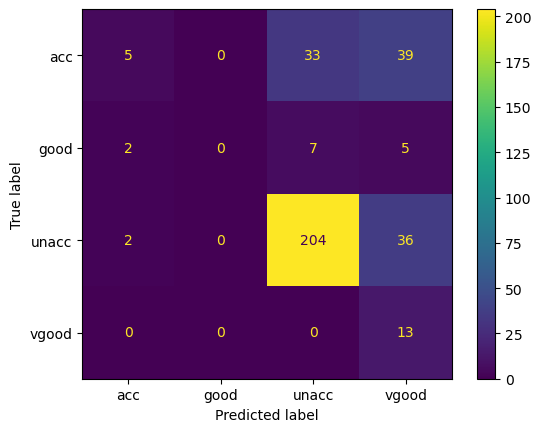

In [28]:
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
y_nb_pred = nb_model.predict(X_test)

print("=== Naive Bayes ===")
print(classification_report(y_test, y_nb_pred))
ConfusionMatrixDisplay.from_predictions(y_test, y_nb_pred)

# Results

Among the models tested, the Decision Tree classifier produced the highest overall performance, with 99% accuracy and strong F1-scores across all classes. However, this model also showed signs of potential overfitting due to the structured nature of the dataset. The Random Forest model offered slightly lower accuracy (97%), but was more stable and balanced across minority classes like vgood and good, making it a better choice for generalization.

In contrast, SVM underperformed (93% accuracy), struggling particularly with good, due to its reliance on distance metrics that are not well-suited to ordinal-encoded categorical data. k-NN faced similar issues, showing a strong bias toward the majority class and weaker recall on underrepresented labels.

Naive Bayes performed the worst (64% accuracy), largely due to its inappropriate assumptions of feature independence and normally distributed continuous inputs — which do not match this dataset’s categorical structure.

## Parameters

For baseline comparisons, all models were initially trained using default parameters from scikit-learn. This allowed me to assess their natural performance on the dataset without overfitting to specific hyperparameters. In a real-world deployment, models like Decision Tree and SVM would benefit from grid search or cross-validation tuning (e.g., max depth, kernel type), while k-NN would require careful selection of k to balance sensitivity and generalization.